# ****Hotel Customer and Revenue Analysis****

## **Introduction**

This analysis focuses on exploring customer booking data to uncover actionable insights into customer behavior, preferences, and their impact on hotel revenue. By examining booking trends and customer profiles, the project aims to provide data-driven recommendations to enhance customer satisfaction and optimize the hotel's operations.

### ****Table of Contents****
1. [Introduction](#introduction)
2. [Data Preparation](#Data-Preparation)
3. [RFM Analysis](#RFM-Analysis)
4. [Behavioral Insights](#Behavioral-Insights)
    - [Spending Behavior](#Spending-Behavior)
    - [Room Preferences](#Room-Preferences)
    - [Lead Time](#Lead-Time)
    - [Cancellation and No-Show Rates](#Cancellation-and-No-Show-Rates)
5. [Channel and Market Analysis](#Channel-and-Market-Analysis)
6. [Demographic Insights](#Demographic-Insights)
7. [Conclusion](#Conclusion)
8. [Assumptions and Caveats](#Asumptions-and-Caveats)

## **Data Preparation**

The first step of the analysis involves loading and examining the structure of the dataset. 

This ensures the data is properly understood and prepared for further analysis. The dataset was imported and its initial structure was explored. The dataset contains key information such as customer demographics, booking behaviors, room preferences, and revenue metrics.

Below is a preview of the dataset, with the first few rows and columns:

In [1875]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [1876]:
file_path = '../Data/HotelCustomersDataset.xlsx'
hotel_df = pd.read_excel(file_path)

In [1877]:
hotel_df.head(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.00,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.00,105.30,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.00,53.00,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.00,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.00,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.00,60.00,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.00,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [1878]:
hotel_df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

In [1879]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

The dataset comprises **30 columns** and **83,590 rows**, covering a variety of features such as:

**Customer Demographics**: Includes `id`, `nationality`, and `age`.

**Booking Behaviors**: Tracks metrics like `days_since_creation`, `average_lead_time`, and `bookings_canceled`.

**Room Preferences**: Boolean indicators for room features (e.g., `sr_king_size_bed`, `sr_quiet_room`).

**Revenue**: Detailed breakdown of lodging_revenue, other_revenue

In [1880]:
hotel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,83590.00,41795.50,24130.50,1.00,20898.25,41795.50,62692.75,83590.00
Age,79811.00,45.40,16.57,-11.00,34.00,46.00,57.00,122.00
DaysSinceCreation,83590.00,453.64,313.39,0.00,177.00,397.00,723.00,1095.00
AverageLeadTime,83590.00,66.20,87.76,-1.00,0.00,29.00,103.00,588.00
LodgingRevenue,83590.00,298.80,372.85,0.00,59.00,234.00,402.00,21781.00
OtherRevenue,83590.00,67.59,114.33,0.00,2.00,38.50,87.67,7730.25
BookingsCanceled,83590.00,0.00,0.07,0.00,0.00,0.00,0.00,9.00
BookingsNoShowed,83590.00,0.00,0.03,0.00,0.00,0.00,0.00,3.00
BookingsCheckedIn,83590.00,0.79,0.70,0.00,1.00,1.00,1.00,66.00
PersonsNights,83590.00,4.65,4.57,0.00,1.00,4.00,6.00,116.00


Rename column names to snake_case to standardize. 

In [1881]:
hotel_df.columns = (
    hotel_df.columns
    .str.replace('([a-z])([A-Z])', r'\1_\2', regex=True)
    .str.replace('([A-Z]+)([A-Z][a-z])', r'\1_\2', regex=True)
    .str.lower()
    .str.strip('_')
)

Check for duplicates in `id` column to ensure customer id can be used as key and has no duplicates.

In [1882]:
hotel_df['id'].duplicated().sum()

np.int64(0)

In [1883]:
# Check for null values in all columns.
hotel_df.isnull().sum()

id                              0
nationality                     0
age                          3779
days_since_creation             0
name_hash                       0
doc_id_hash                     0
average_lead_time               0
lodging_revenue                 0
other_revenue                   0
bookings_canceled               0
bookings_no_showed              0
bookings_checked_in             0
persons_nights                  0
room_nights                     0
days_since_last_stay            0
days_since_first_stay           0
distribution_channel            0
market_segment                  0
sr_high_floor                   0
sr_low_floor                    0
sr_accessible_room              0
sr_medium_floor                 0
sr_bathtub                      0
sr_shower                       0
sr_crib                         0
sr_king_size_bed                0
sr_twin_bed                     0
sr_near_elevator                0
sr_away_from_elevator           0
sr_no_alcohol_

Most columns except for the column `age` has no `null` values.

Since the `min` value for `age` is a negative value, further examination will be held to replace with `null` if data is invalid or misrepresenting. 

Also, the `age` column is consisted of `float`s. For better representation, will change the type to integers.

In [1884]:
hotel_df.loc[hotel_df['age'] < 0, 'age'].unique()

array([ -7.,  -9., -11., -10.,  -6.,  -1.])

In [1885]:
hotel_df.loc[hotel_df['age'] < 0, 'age'] = np.nan

In [1886]:
hotel_df['age'] = hotel_df['age'].replace("", np.nan)

In [1887]:
if hotel_df['age'].dropna().apply(float.is_integer).all():
    hotel_df['age'] = hotel_df['age'].astype('Int64')

In [1888]:
# Set display option for Pandas DataFrame to show two decimal places for `lodging_revenue` and `other_revenue`
float_cols = hotel_df.select_dtypes(include=['float'])
hotel_df[float_cols.columns] = hotel_df[float_cols.columns].round(2)
pd.options.display.float_format = '{:.2f}'.format

In [1889]:
# Check for inconsistent encodings in categorical variables
categorical_columns = ['distribution_channel', 'market_segment', 'nationality']
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(hotel_df[col].unique())

Unique values in distribution_channel:
['Corporate' 'Travel Agent/Operator' 'Direct' 'Electronic Distribution']
Unique values in market_segment:
['Corporate' 'Travel Agent/Operator' 'Other' 'Direct' 'Complementary'
 'Groups' 'Aviation']
Unique values in nationality:
['PRT' 'DEU' 'FRA' 'JPN' 'IRL' 'ESP' 'BEL' 'NLD' 'AUT' 'ITA' 'CHN' 'RUS'
 'POL' 'USA' 'HUN' 'CRI' 'MEX' 'CHE' 'ROU' 'GBR' 'BIH' 'BRA' 'FIN' 'AGO'
 'CAN' 'ZAF' 'TWN' 'GRC' 'AUS' 'ISR' 'BGR' 'SAU' 'SWE' 'CYP' 'ARG' 'ARM'
 'CHL' 'MAR' 'MOZ' 'KOR' 'TUN' 'DNK' 'NOR' 'MYS' 'EGY' 'IND' 'HRV' 'CPV'
 'JOR' 'COD' 'DZA' 'LUX' 'TUR' 'IRN' 'LBY' 'PAN' 'COL' 'VEN' 'GNB' 'CZE'
 'AND' 'SVN' 'PER' 'ATF' 'UGA' 'AZE' 'NZL' 'LTU' 'SRB' 'EST' 'KAZ' 'KWT'
 'IDN' 'UKR' 'SVK' 'MLI' 'ARE' 'BGD' 'THA' 'TZA' 'LVA' 'PHL' 'BHR' 'NAM'
 'BOL' 'SGP' 'CMR' 'MLT' 'URY' 'PAK' 'JAM' 'ECU' 'SYC' 'QAT' 'PRY' 'BRB'
 'OMN' 'TMP' 'ABW' 'LBN' 'AIA' 'SLV' 'DMA' 'CUB' 'VNM' 'GEO' 'IRQ' 'GAB'
 'PYF' 'LIE' 'SEN' 'BLR' 'ISL' 'DOM' 'GUY' 'LCA' 'ATA' 'NGA' 'RWA' 'CIV'
 'A

In [1890]:
# Remove unnecessary columns
hotel_df.drop(['name_hash', 'doc_id_hash'], axis=1, inplace=True)

Looking at the data, there is a considerable number of customers who have neither canceled, no-showed, nor completed a booking. 

This likely includes individuals whose check-in dates have not yet arrived or those who abandoned the booking process before completion. 

Including these rows could dilute the analysis results, as these customers do not actively contribute to the metrics where the reservation was actually made. More about this data will be discussed in [#Conclusion] To ensure the analysis remains focused, these rows will be excluded for now.

In [1891]:
exclusion_filter = (
    (hotel_df['bookings_checked_in'] == 0) &
    (hotel_df['bookings_no_showed'] == 0) &
    (hotel_df['bookings_canceled'] == 0)
)
hotel_df[exclusion_filter]

,id,nationality,age,days_since_creation,average_lead_time,lodging_revenue,other_revenue,bookings_canceled,bookings_no_showed,bookings_checked_in,...,sr_medium_floor,sr_bathtub,sr_shower,sr_crib,sr_king_size_bed,sr_twin_bed,sr_near_elevator,sr_away_from_elevator,sr_no_alcohol_in_mini_bar,sr_quiet_room
2,3,DEU,31,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,49,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,FRA,42,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,11,IRL,27,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83581,83582,DEU,48,0,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83583,83584,PRT,49,0,0,0.00,0.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83585,83586,ITA,54,0,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83587,83588,IRL,53,0,0,0.00,0.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0


A new column, `total_revenue`, was created by summing the `lodging_revenue` and `other_revenue` columns. This provides a comprehensive view of the total financial contribution of each customer.

In [1892]:
hotel_df['total_revenue'] = hotel_df['lodging_revenue'] + hotel_df['other_revenue']
excluded_df = hotel_df[exclusion_filter]
hotel_df = hotel_df[~exclusion_filter]
rfm = hotel_df[['id','days_since_last_stay', 'bookings_checked_in', 'total_revenue']].copy()

In [1893]:
hotel_df.head()

,id,nationality,age,days_since_creation,average_lead_time,lodging_revenue,other_revenue,bookings_canceled,bookings_no_showed,bookings_checked_in,...,sr_bathtub,sr_shower,sr_crib,sr_king_size_bed,sr_twin_bed,sr_near_elevator,sr_away_from_elevator,sr_no_alcohol_in_mini_bar,sr_quiet_room,total_revenue
0,1,PRT,51,150,45,371.00,105.30,1,0,3,...,0,0,0,0,0,0,0,0,0,476.30
1,2,PRT,<NA>,1095,61,280.00,53.00,0,0,1,...,0,0,0,0,0,0,0,0,0,333.00
3,4,FRA,60,1095,93,240.00,60.00,0,0,1,...,0,0,0,0,0,0,0,0,0,300.00
5,6,JPN,54,1095,58,230.00,24.00,0,0,1,...,0,0,0,0,0,0,0,0,0,254.00
7,8,FRA,32,1095,38,535.00,94.00,0,0,1,...,0,0,0,1,0,0,0,0,0,629.00


---

## **RFM Analysis**

**RFM (Recency, Frequency, and Monetary) analysis** is a powerful method for understanding customer behavior and segmenting customers based on their interactions with the business.

> The following columns have been used to measure each category of the RFM Analysis.
>
> ***Recency*** - `days_since_last_stay`
> 
> ***Frequency*** - `bookings_checked_in` 
> 
> ***Monetary*** - `lodging_revenue` + `other_revenue`

In [1894]:
def rfm_score(value, quantiles, column_name):
    if column_name == 'days_since_last_stay':
        if value <= 90:
            return 4
        elif value <= 180:
            return 3
        elif value <= 365:
            return 2
        elif value <= 1080:
            return 1
        else:
            return 0 # Over 3 years may indicate churn risk        
    elif column_name == 'bookings_checked_in':
        if value >= 10:
            return 4
        elif value >= 5:
            return 3
        elif value >= 2:
            return 2
        else:
            return 1
    else:
        if value <= 100:
            return 1
        elif value <= 500:
            return 2
        elif value <= 1000:
            return 3
        else:
            return 4

**Scoring Thresholds in `rfm_score`**
> **Recency (R)**
>
> The `days_since_last_stay` variable revealed distinct clusters, such as **920 days** and **472 days**.
>
> There exists many values where customers haven’t stayed for years, indicating they may have churned.
>
> To reflect engagement levels and potential churn risk, the following thresholds were applied:
> 
>  *0–90 days → Score 4*
> 
> *91–180 days → Score 3*
>
> *181–365 days → Score 2*
>
> *366–1080 days (1–3 years)→ Score 1*
> 
> *over 1080 days (>3years)→ Score 0 (likely churned)*


> **Frequency (F)**
>
> The `bookings_checked_in` variable displayed a highly skewed distribution. **Most customers had only 1 booking**, while very few had multiple bookings.
>
> To account for this imbalance, the following thresholds were applied:
>
> *0 or 1 bookings → Score 1 (low frequency)*
>
> *2 to 4 bookings → Score 2*
>
> *5 to 9 bookings → Score 3*
>
> *10 or more bookings → Score 4 (high frequency)*


> **Monetary (M)**
>
> The `total_revenue` variable showed a concentration of modest spending (around **€200**), with smaller clusters at mid-range and high spending levels.
> 
> To differentiate customers by their financial contributions, the following thresholds were applied:
> 
> *€0–€100 → Score 1 (Minimal spenders, often casual customers or single-stay guests)*
>
> *€0-€100 → Score 1*
>
> *€101-€500 → Score 2*
>
> *€501-€1000 → Score 3*
>
> *€1000 → Score 4*

In [1895]:
rfm['R'] = rfm['days_since_last_stay'].apply(rfm_score, args=(quantiles, 'days_since_last_stay'))
rfm['F'] = rfm['bookings_checked_in'].apply(rfm_score, args=(quantiles, 'bookings_checked_in'))
rfm['M'] = rfm['total_revenue'].apply(rfm_score, args=(quantiles, 'total_revenue'))

# RFM scores into columns `RFM_segment` and `RFM_score`
rfm['RFM_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_score'] = rfm[['R', 'F', 'M']].sum(axis=1)

In [1896]:
rfm.head()

,id,days_since_last_stay,bookings_checked_in,total_revenue,R,F,M,RFM_segment,RFM_score
0,1,151,3,476.30,3,2,2,322,7
1,2,1100,1,333.00,0,1,2,012,3
3,4,1100,1,300.00,0,1,2,012,3
5,6,1097,1,254.00,0,1,2,012,3
7,8,1100,1,629.00,0,1,3,013,4


In [1897]:
r_dist = rfm['R'].value_counts().sort_index()
f_dist = rfm['F'].value_counts().sort_index()
m_dist = rfm['M'].value_counts().sort_index()

# Print distributions
print("Recency (R) Distribution:\n", r_dist)
print("\nFrequency (F) Distribution:\n", f_dist)
print("\nMonetary (M) Distribution:\n", m_dist)

Recency (R) Distribution:
 R
0      327
1    41480
2    10954
3     6021
4     4889
Name: count, dtype: int64

Frequency (F) Distribution:
 F
1    62216
2     1338
3       75
4       42
Name: count, dtype: int64

Monetary (M) Distribution:
 M
1     3046
2    39926
3    15671
4     5028
Name: count, dtype: int64


In [1898]:
def assign_segment(row):
    # VIP Guests
    if row['R'] >= 3 and row['F'] >= 2 and row['M'] >= 3:
        return 'VIP Guests'
    # New Guests
    elif row['R'] >= 4 and row['F'] <= 1:
        return 'New Guests'
    # Low Spend Guests
    elif row['M'] <= 1:
        return 'Low Spend Guests'
    # Frequent Guests
    elif row['R'] >= 2 and row['F'] >= 2:
        return 'Frequent Guests'
    # Seasonal Spenders
    elif row['F'] <= 2 and row['M'] >= 3:
        return 'Seasonal Spenders'
    # Occasional Guests
    elif row['R'] <= 2 and row['F'] <= 2:
        return 'Occasional Guests'
    # Inactive Guests
    elif row['R'] == 0 and row['F'] == 1 and row['M'] == 1:
        return 'Inactive Guests'
    # Default
    else:
        return 'Other'

# Apply segmentation
rfm['segment'] = rfm.apply(assign_segment, axis=1)

# Check segment counts
print(rfm['segment'].value_counts())

hotel_df = hotel_df.merge(rfm[['id', 'segment']], on='id', how='left')

segment
Occasional Guests    33677
Seasonal Spenders    18699
New Guests            4663
Other                 3051
Low Spend Guests      2733
Frequent Guests        547
VIP Guests             301
Name: count, dtype: int64


Here is an overview of the different RFM Segments I have defined for the dataset.

**VIP Guests**

Customers with high `recency`, `frequency`, and `monetary` scores, indicating strong loyalty and significant revenue contribution. They are the most valuable guests and require personalized attention.

**Frequent Guests**

Customers with moderate to high `recency` and `frequency` scores, indicating consistent engagement and potential loyalty. They may not always spend the most but are reliable bookers.

**New Guests**

Recently engaged customers with low `frequency` and `spending`. They are at the beginning of their journey and present opportunities for further engagement.

**Occasional Guests**

Customers with low scores across `recency`, `frequency`, and `monetary`. They engage sporadically and have minimal impact on revenue if only viewed individually.

**Seasonal Spenders**

Customers with low `recency` but high `monetary` scores. They engage infrequently, often during specific seasons or events, but contribute significantly when they do.

**Low Spend Guests**

Customers with minimal `monetary` contributions, regardless of their `engagement` or `frequency`. They are likely budget-conscious or prefer lower-cost services.

**Inactive Guests**

Customers with very low engagement and spending, often showing signs of churn. Re-engagement strategies are required to bring them back.

**Other**

Customers who don’t fit neatly into the above categories due to unusual data patterns or edge cases. 

### **Revenue and RFM Segments**

Distribution of total `revenue` across the segments assigned from above.

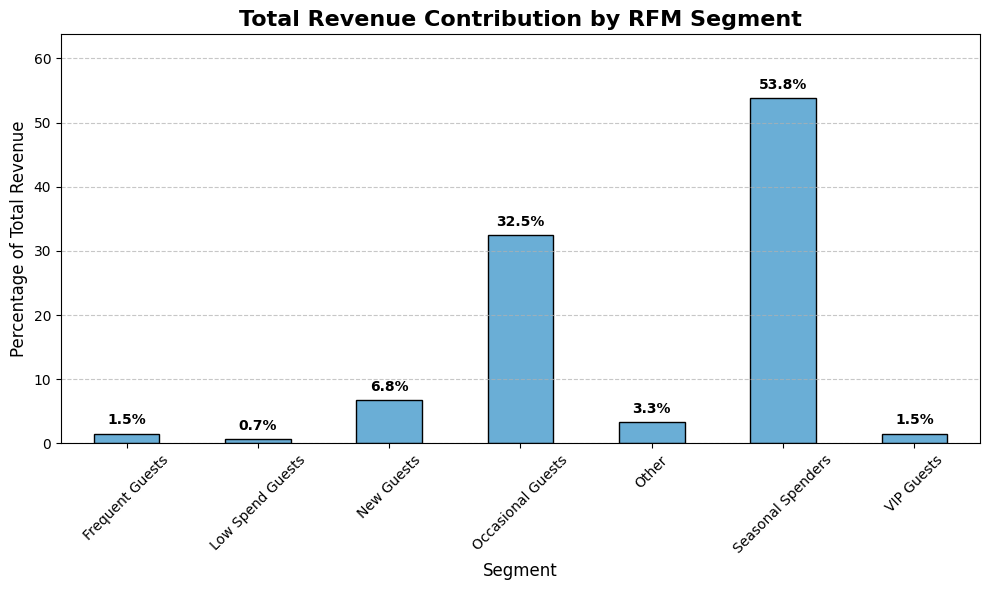

In [1899]:
segment_revenue = hotel_df.groupby('segment')[['lodging_revenue', 'other_revenue']].sum()

segment_revenue['total_revenue'] = segment_revenue['lodging_revenue'] + segment_revenue['other_revenue']
total_revenue_sum = segment_revenue['total_revenue'].sum()
segment_revenue['total_revenue_percentage'] = (segment_revenue['total_revenue'] / total_revenue_sum) * 100

color_palette = sns.color_palette("Blues", n_colors=1)

ax = segment_revenue['total_revenue_percentage'].plot(
    kind='bar',
    figsize=(10, 6),
    color=color_palette,
    edgecolor='black'
)

# Add percentage labels on top of each bar
for i, percentage in enumerate(segment_revenue['total_revenue_percentage']):
    ax.text(i, percentage + 1,  # Position label slightly above the bar
            f'{percentage:.1f}%', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Extra space above bars
max_percentage = segment_revenue['total_revenue_percentage'].max()
plt.ylim(0, max_percentage + 10)

# Plot title and labels
plt.title('Total Revenue Contribution by RFM Segment', fontsize=16, weight='bold')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Percentage of Total Revenue', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Seasonal Spenders** contribute over **50% (53.8%)** of the total revenue, making them the most impactful segment for the hotel's overall income.

Now I will examine the average spending of the customers across the segments.

For better examiniation, I will also look at how much of the revenue contributes to `other_revenue` and `lodging_revenue`

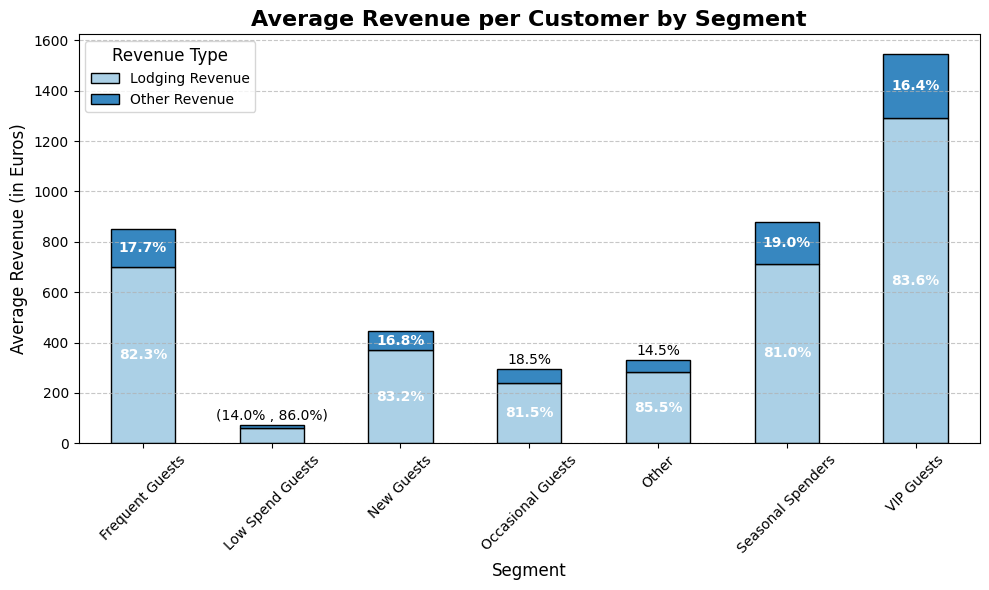

In [1900]:
segment_revenue['customers'] = hotel_df['segment'].value_counts()
segment_revenue['avg_lodging_revenue'] = segment_revenue['lodging_revenue'] / segment_revenue['customers']
segment_revenue['avg_other_revenue'] = segment_revenue['other_revenue'] / segment_revenue['customers']

total_revenue = segment_revenue['avg_lodging_revenue'] + segment_revenue['avg_other_revenue']
lodging_percentage = (segment_revenue['avg_lodging_revenue'] / total_revenue) * 100
other_percentage = (segment_revenue['avg_other_revenue'] / total_revenue) * 100

# Value threshold for annotations
value_threshold = 70 
bar_spacing = 8 

color_palette = sns.color_palette("Blues", n_colors=2)

ax = segment_revenue[['avg_lodging_revenue', 'avg_other_revenue']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=color_palette,
    edgecolor='black'
)

# Percentage annotation
for i, (lodging_value, other_value, lodging, other) in enumerate(zip(
    segment_revenue['avg_lodging_revenue'], segment_revenue['avg_other_revenue'],
    lodging_percentage, other_percentage
)):
    # Total bar height
    total_height = lodging_value + other_value

    if lodging_value >= value_threshold:
        ax.text(i, lodging_value / 2,  # Inside the bar
                f'{lodging:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

    if lodging_value < value_threshold and other_value < value_threshold:
        ax.text(i, total_height + bar_spacing,  # Extra spacing for small bars
                f'({other:.1f}% , {lodging:.1f}%)', ha='center', va='bottom', color='black', fontsize=10)
    elif other_value >= value_threshold:
        ax.text(i, lodging_value + (other_value / 2),  # Inside the bar
                f'{other:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    else:
        # Place outside with standard spacing
        ax.text(i, total_height + bar_spacing,
                f'{other:.1f}%', ha='center', va='bottom', color='black', fontsize=10)



plt.title('Average Revenue per Customer by Segment', fontsize=16, weight='bold')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Average Revenue (in Euros)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Revenue Type', labels=['Lodging Revenue', 'Other Revenue'], fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Although **VIP Guests** only contribute a small amount to the total revenue, looking at the average revenue, **VIP Guests** have the highest average with over **1400 Euros** per customer. 

## **Behavioral Insights**

- ### Room Preferences

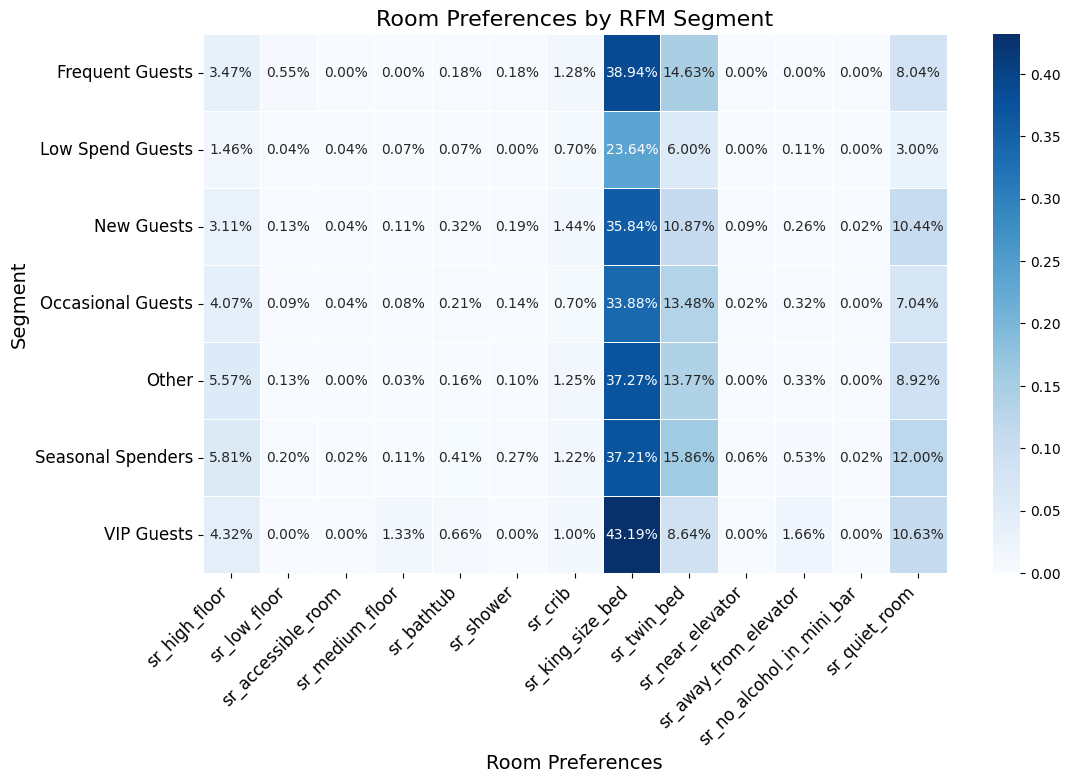

In [1901]:
sr_columns = ['sr_high_floor', 'sr_low_floor', 'sr_accessible_room', 'sr_medium_floor',
              'sr_bathtub', 'sr_shower', 'sr_crib', 'sr_king_size_bed', 'sr_twin_bed',
              'sr_near_elevator', 'sr_away_from_elevator', 'sr_no_alcohol_in_mini_bar',
              'sr_quiet_room']

preferences_by_segment = hotel_df.groupby('segment')[sr_columns].mean()

plt.figure(figsize=(12, 7))
sns.heatmap(preferences_by_segment, annot=True, fmt=".2%", cmap="Blues", cbar=True, linewidths=0.5)
plt.title('Room Preferences by RFM Segment', fontsize=16)
plt.ylabel('Segment', fontsize=14)
plt.xlabel('Room Preferences', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Strong preference for **King-Sized Beds** across all segments, especially **VIP Guests**

**Seasonal Spenders** value **King-Sized Beds** and **Quiet Rooms**.

## Lead Time

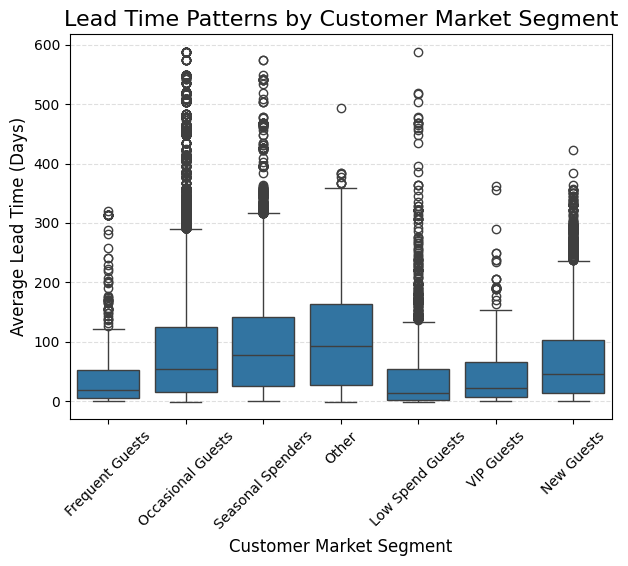

In [1902]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=hotel_df, x='segment', y='average_lead_time')
plt.title('Lead Time Patterns by Customer Market Segment', fontsize=16)
plt.ylabel('Average Lead Time (Days)', fontsize=12)
plt.xlabel('Customer Market Segment', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

**Long Lead Times** for **Seasonal Spenders** and **Occasional Guests** 

**Frequent Guest** and **VIP Guests** show shorter lead times

## peron nights and room nights by rfm segment

## Cancellation and No-Show Rates

Understanding `cancellation` and `no-show` rates is crucial for effective revenue management and operational planning in the hospitality industry. This chart examines the average `cancellation` and `no-show` rates across different RFM segments, providing insights into guest behaviors and potential revenue risks.

<Figure size 1000x800 with 0 Axes>

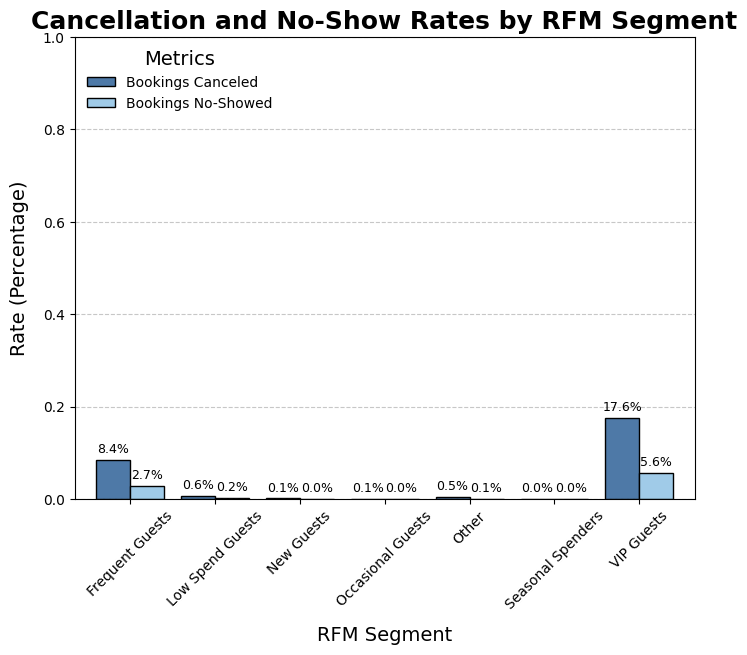

In [1903]:
cancellation_rates = hotel_df.groupby('segment')[['bookings_canceled', 'bookings_no_showed']].mean()
plt.figure(figsize=(10, 8))

ax = cancellation_rates.plot(
    kind='bar',
    figsize=(8, 6),
    edgecolor='black',
    width=0.8,
    color=['#4E79A7', '#A0CBE8']
)

plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    labels = [f'{v * 100:.1f}%' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=9, padding=3, color='black')

plt.title('Cancellation and No-Show Rates by RFM Segment', fontsize=18, weight='bold')
plt.ylabel('Rate (Percentage)', fontsize=14, labelpad=10)
plt.xlabel('RFM Segment', fontsize=14, labelpad=10)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.legend(
    ['Bookings Canceled', 'Bookings No-Showed'], 
    title='Metrics', 
    fontsize=10,
    title_fontsize=14,
    loc='upper left',
    frameon=False
)
plt.show()

# **Channel and Market Insights**

## Distribution of Revenue by Distribution Channel

What is the distribution of revenue by distribution channel?

In [1904]:
revenue_by_channel = hotel_df.groupby('distribution_channel').agg({
    'total_revenue': 'sum',
    'lodging_revenue': 'sum',
    'other_revenue': 'sum'
}).reset_index()

revenue_by_channel['percentage'] = (revenue_by_channel['total_revenue'] / revenue_by_channel['total_revenue'].sum()) * 100

revenue_by_channel.sort_values('total_revenue', ascending=False)

,distribution_channel,total_revenue,lodging_revenue,other_revenue,percentage
3,Travel Agent/Operator,25047003.94,20375616.08,4671387.86,81.78
1,Direct,4394642.76,3607374.43,787268.33,14.35
0,Corporate,1022587.94,848578.46,174009.48,3.34
2,Electronic Distribution,162407.35,145297.49,17109.86,0.53


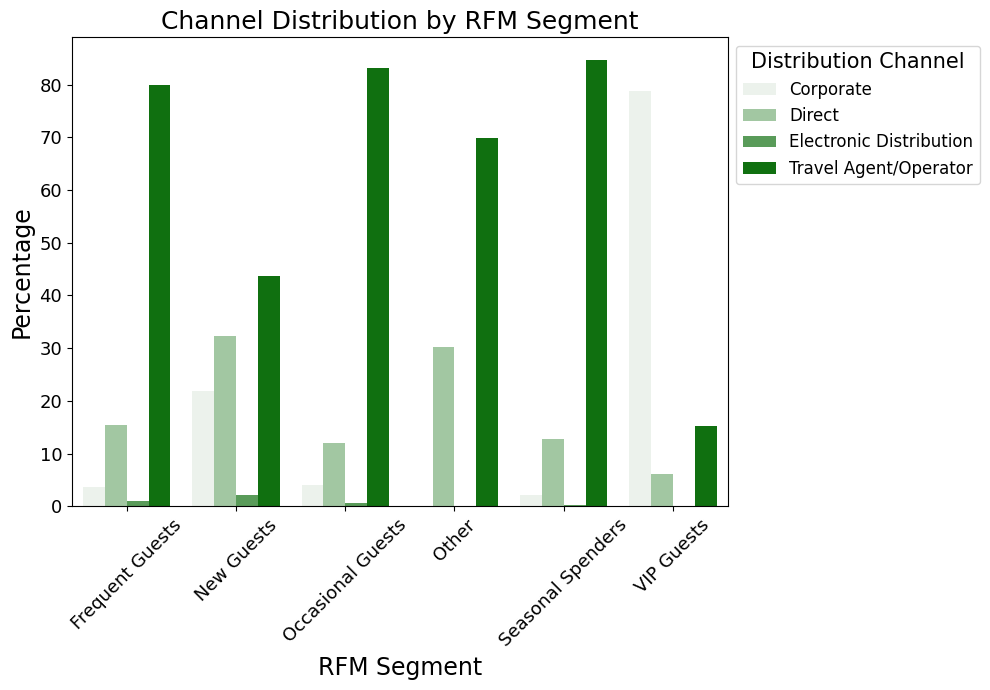

In [1905]:
palette_channel = sns.light_palette("green", n_colors=distribution_channel_dist['distribution_channel'].nunique())

plt.figure(figsize=(10, 7))
sns.barplot(
    data=distribution_channel_dist, 
    x='segment', 
    y='percentage', 
    hue='distribution_channel', 
    palette=palette_channel
)

plt.title('Channel Distribution by RFM Segment', fontsize=18)
plt.ylabel('Percentage', fontsize=17)
plt.xlabel('RFM Segment', fontsize=17)
plt.tick_params(axis='x', rotation=45, labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(
    title='Distribution Channel', 
    fontsize=12, 
    title_fontsize=15, 
    loc='upper left', 
    bbox_to_anchor=(1, 1)
)

plt.tight_layout()
plt.show()

From the above plots and tables, we can observe the following key insights regarding the hotel's primary revenue channels:

- **Primary Channels**: The hotel primarily generates revenue through:
  - `Travel Agent/Operator`
  - `Direct` bookings

- **Booking Comparison**:
  - `Travel Agent/Operator` has significantly more bookings (**52,255** vs. **8,560**).
  - The average revenue per booking is slightly higher for the `Direct` channel:
    - `Travel Agent/Operator`: **€479.32**
    - `Direct`: **€513.39**

> **Note**: [The SQL query used to calculate these values is available in the `query.sql` file.]

To evaluate the potential benefits of increasing direct bookings, a **U Test** will be conducted. This statistical analysis will determine whether the observed difference in average revenue per booking is significant.


In [1921]:
direct_revenue = hotel_df[hotel_df['distribution_channel'] == 'Direct']['total_revenue']
travel_agent_revenue = hotel_df[hotel_df['distribution_channel'] == 'Travel Agent/Operator']['total_revenue']
result = mannwhitneyu(direct_revenue, travel_agent_revenue, alternative='two-sided')
print(f"U Test result= {result.statistic}, p-value={result.pvalue}")

U Test result= 216836231.0, p-value=5.998290459667069e-06


The U Test result (statistic = 3216836231.0, p-value = 5.998290459667069e-06) indicates a highly significant difference between the revenue distributions of the Direct and Travel Agent/Operator channels. This confirms that the observed difference in average revenue per booking is not due to random chance.

## Distribution of Revenue by Cutomer Market Segment

What is the distribution of revenue by market segment?

In [1907]:
revenue_by_market = hotel_df.groupby('market_segment').agg({
    'total_revenue': 'sum',
    'lodging_revenue': 'sum',
    'other_revenue': 'sum'
}).reset_index()

revenue_by_market['percentage'] = (revenue_by_market['total_revenue'] / revenue_by_market['total_revenue'].sum()) * 100

revenue_by_market.sort_values('total_revenue', ascending=False)

,market_segment,total_revenue,lodging_revenue,other_revenue,percentage
5,Other,18426360.57,15220011.29,3206349.28,60.16
3,Direct,4418778.48,3629166.33,789612.15,14.43
6,Travel Agent/Operator,3549893.62,2675887.30,874006.32,11.59
4,Groups,3245908.96,2635631.19,610277.77,10.60
2,Corporate,815483.61,674244.74,141238.87,2.66
0,Aviation,150018.20,130292.35,19725.85,0.49
1,Complementary,20198.55,11633.26,8565.29,0.07


We can observe that the customers with `market_segment` of `'Other'` have the most spending in the hotel. 

What is the distribution of average revenue per booking by market segment?

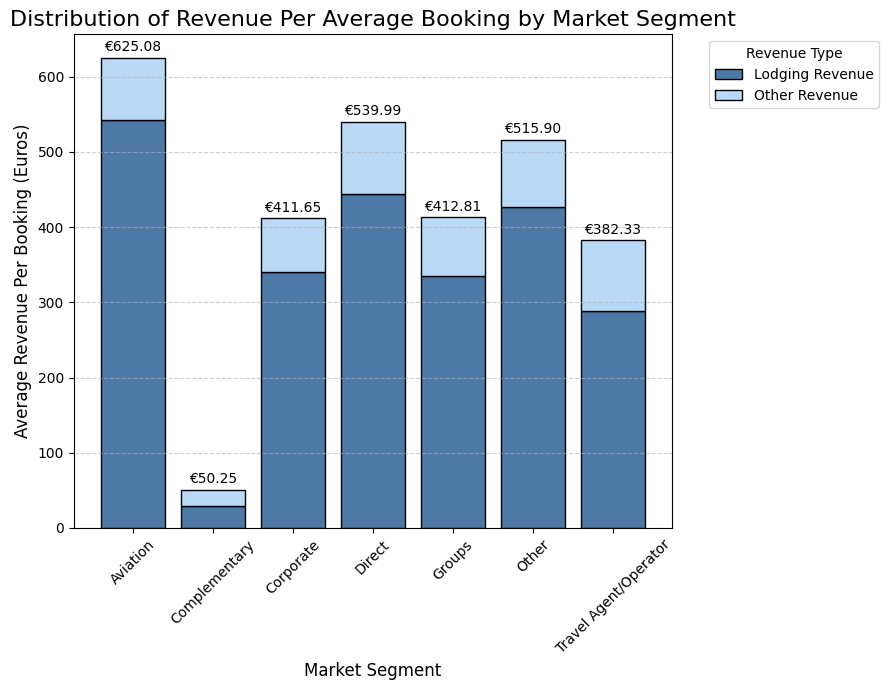

In [1908]:
avg_revenue_by_segment = hotel_df.groupby('market_segment').agg({
    'total_revenue': 'mean',
    'lodging_revenue': 'mean',
    'other_revenue': 'mean'
}).reset_index()

plt.figure(figsize=(9, 7))

bars_lodging = plt.bar(avg_revenue_by_segment['market_segment'], 
                       avg_revenue_by_segment['lodging_revenue'], 
                       color='#4E79A7', edgecolor='black', label='Lodging Revenue')

bars_other = plt.bar(avg_revenue_by_segment['market_segment'], 
                     avg_revenue_by_segment['other_revenue'], 
                     bottom=avg_revenue_by_segment['lodging_revenue'], 
                     color='#bad9f7', edgecolor='black', label='Other Revenue')

for i, total in enumerate(avg_revenue_by_segment['total_revenue']):
    plt.text(i, total + 5, f'€{total:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution of Revenue Per Average Booking by Market Segment', fontsize=16)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Average Revenue Per Booking (Euros)', fontsize=12)
plt.xticks(range(len(avg_revenue_by_segment['market_segment'])), 
           avg_revenue_by_segment['market_segment'], rotation=45, fontsize=10)
plt.legend(title='Revenue Type',fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Now lets also examine the `Market Segment` distribution by the `RFM Segment` for further analysis.

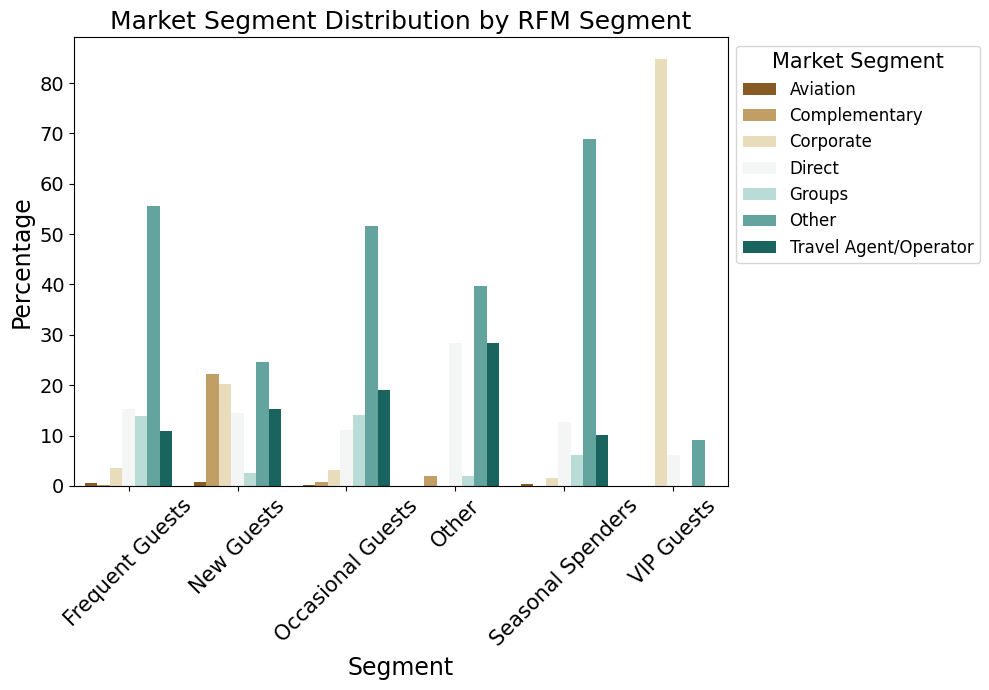

In [1909]:
palette_market = sns.color_palette("BrBG", n_colors=market_segment_dist['market_segment'].nunique())

plt.figure(figsize=(10, 7))
sns.barplot(
    data=market_segment_dist, 
    x='segment', 
    y='percentage', 
    hue='market_segment', 
    palette=palette_market
)

plt.title('Market Segment Distribution by RFM Segment', fontsize=18)
plt.ylabel('Percentage', fontsize=17)
plt.xlabel('Segment', fontsize=17)
plt.tick_params(axis='x', rotation=45, labelsize=15)
plt.tick_params(axis='y', labelsize=14)
plt.legend(
    title='Market Segment', 
    fontsize=12, 
    title_fontsize=15, 
    loc='upper left', 
    bbox_to_anchor=(1, 1),
    ncol=1
)

plt.tight_layout()
plt.show()


`Frequent Guests`, `Occasional Guests`, `Seasonal Spenders` rely heavily on `Travel Agent/Operator`. 

`New Guests` have a relatively higher distribution of `Aviation` and `Complementary` market segment distribution. 
A large portion of `VIP Guests` has the `Corporate` market segment, which aligns well with the fact that most of the `VIP Guests`'s bookings are done with the `Corporate` and `Direct` channel. 

Although `Aviation` is only a small portion of the whole revenue distribution, since it has the most `average revenue per booking` and appears largely in the `New Guests` segment, to examine if the `Aviation` segment group could be potential good? customers, a further examination will be done.

## Aviation

In [1910]:
aviation_data = hotel_df[hotel_df['market_segment'] == 'Aviation'][['days_since_last_stay', 'days_since_creation','segment','room_nights','persons_nights','nationality','distribution_channel', 'lodging_revenue', 'other_revenue']]

# **Demographic Insights**

Now we will be moving on to the demographic insights of the hotel dataset. 
This includes `Nationality` and `Age`. 
Although it is important to note that `Nationality` does not indicate the `residence` or `origin of travel` of a customer, just for better insight, we will use `Nationality` for the analysis.

## Nationality

Understand the portion of lodging and other revenue and total revenue by nationality of customer.

In [1911]:
revenue_by_country = hotel_df.groupby('nationality').agg({
    'total_revenue': 'sum',
    'lodging_revenue': 'sum',
    'other_revenue': 'sum'
}).reset_index()
revenue_by_country['percentage'] = (revenue_by_country['total_revenue'] / revenue_by_country['total_revenue'].sum()) * 100
revenue_by_country.sort_values('total_revenue', ascending=False, inplace=True)
revenue_by_country.describe()

,total_revenue,lodging_revenue,other_revenue,percentage
count,177.00,177.00,177.00,177.00
mean,173031.88,141112.24,31919.64,0.56
std,620790.06,499388.32,121886.78,2.03
min,137.20,135.20,2.00,0.00
25%,1114.00,931.80,131.00,0.00
50%,4188.75,3455.90,652.85,0.01
75%,30866.12,25142.75,5259.16,0.10
max,4842481.89,3809315.59,1033166.30,15.81


Since the `median` of the revenue is much smaller than the `mean`, it indicates that the distribution is a `right-skewed` distribution. Most likely only a relatively fewer number of nationalities are contributing disproportionately large volumes of revenue. 

Thus, in this analysis, we will focus on the `top 10 countries`. 

In [1912]:
booking_counts_by_country = hotel_df.groupby('nationality').size().reset_index(name='booking_count')
booking_counts_by_country['percentage'] = (booking_counts_by_country['booking_count'] / booking_counts_by_country['booking_count'].sum()) * 100
booking_counts_by_country.sort_values('booking_count', ascending=False, inplace=True)
booking_counts_by_country.describe()

,booking_count,percentage
count,177.00,177.00
mean,359.72,0.56
std,1337.41,2.10
min,1.00,0.00
25%,2.00,0.00
50%,8.00,0.01
75%,60.00,0.09
max,9572.00,15.03


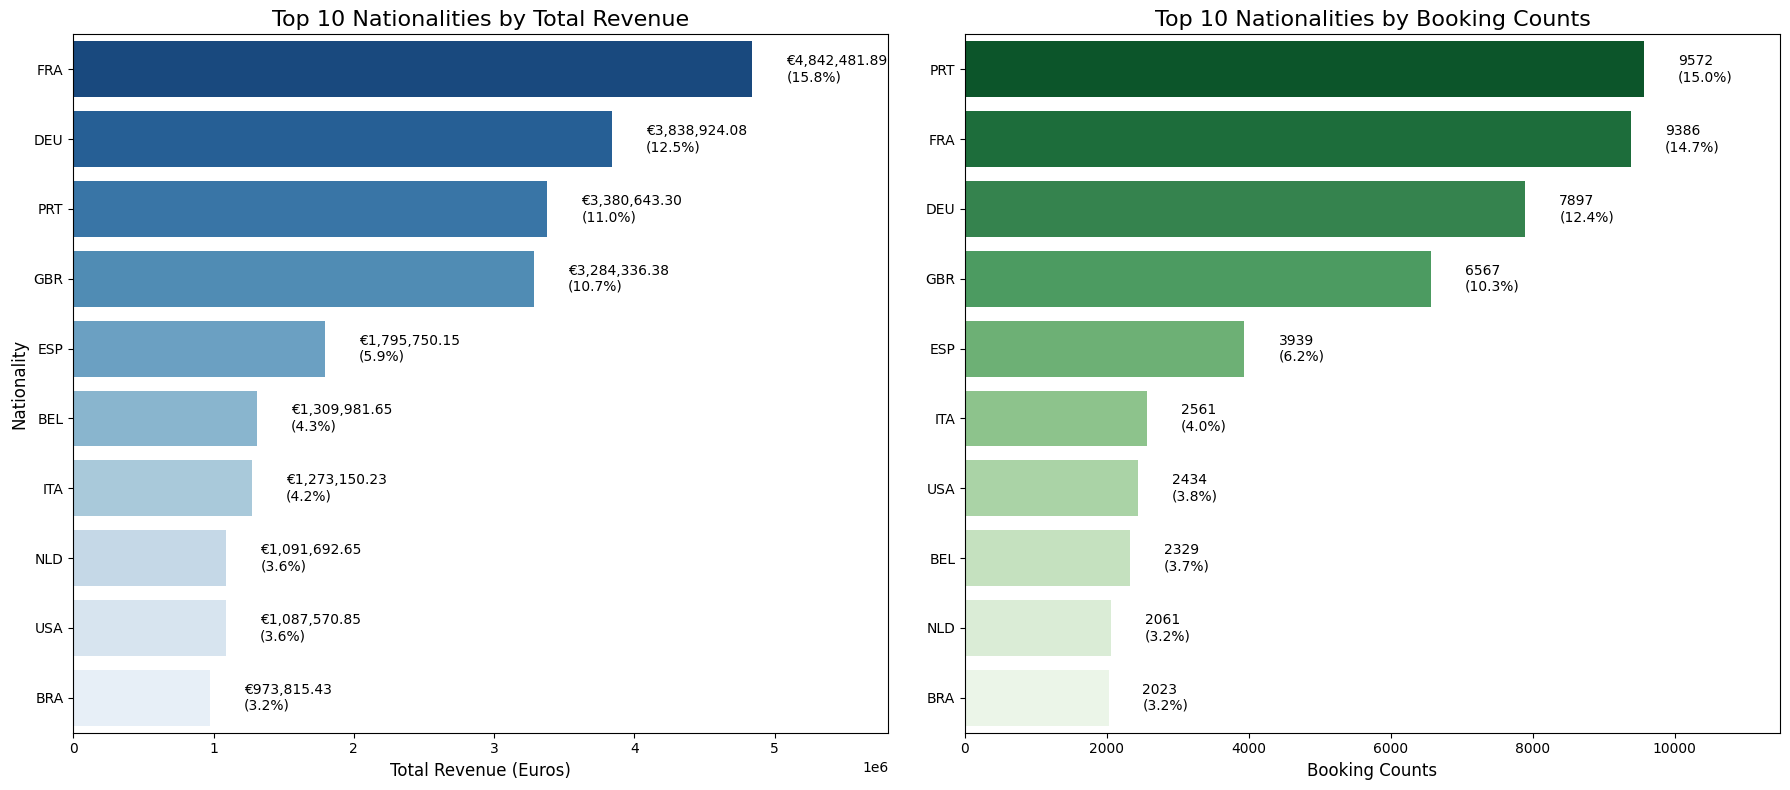

In [1913]:
# Top 10 nationalities by total revenue and booking counts
top_revenue_data = revenue_by_country.head(10)
top_booking_data = booking_counts_by_country.head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Top 10 by Total Revenue
sns.barplot(data=top_revenue_data, x='total_revenue', y='nationality', palette='Blues_r', hue='nationality', dodge=False, legend=False, ax=axes[0])
for i, (revenue, percentage) in enumerate(zip(top_revenue_data['total_revenue'], top_revenue_data['percentage'])):
    axes[0].text(revenue + 0.05 * max(top_revenue_data['total_revenue']), i, 
                 f'€{revenue:,.2f}\n({percentage:.1f}%)', ha='left', va='center', fontsize=10, color='black')
axes[0].set_title('Top 10 Nationalities by Total Revenue', fontsize=16)
axes[0].set_xlabel('Total Revenue (Euros)', fontsize=12)
axes[0].set_ylabel('Nationality', fontsize=12)
axes[0].set_xlim(0, max(top_revenue_data['total_revenue']) * 1.2)

# Plot 2: Top 10 by Booking Counts
sns.barplot(data=top_booking_data, x='booking_count', y='nationality', palette='Greens_r', hue='nationality', dodge=False, legend=False, ax=axes[1])
for i, (count, percentage) in enumerate(zip(top_booking_data['booking_count'], top_booking_data['percentage'])):
    axes[1].text(count + 0.05 * max(top_booking_data['booking_count']), i, 
                 f'{count}\n({percentage:.1f}%)', ha='left', va='center', fontsize=10, color='black')
axes[1].set_title('Top 10 Nationalities by Booking Counts', fontsize=16)
axes[1].set_xlabel('Booking Counts', fontsize=12)
axes[1].set_ylabel('')  # Remove redundant ylabel for the second plot
axes[1].set_xlim(0, max(top_booking_data['booking_count']) * 1.2)

plt.tight_layout()
plt.show()


**`FRA (France)`**: While `FRA` leads in `total revenue` and is second in `booking counts`, this indicates high spending per booking. The hotel might want to analyze why `FRA` guests spend more (e.g., longer stays, premium services).

**`PRT (Portugal)`**: Leads in `booking counts` but ranks third in `total revenue`. Since the hotel is located in Lisbon, Portugal, this might indicate that local bookings involve shorter stays or lower-cost services. It is likely that local corporates or residents utilize the hotel for brief purposes.

**`DEU (Germany)` and `GBR (United Kingdom)`**: Both rank high in `revenue` and `booking counts`, indicating a strong and valuable customer base. Targeted marketing in these regions could further boost revenue.

**`BEL (Belgium)`**: Similar trend to `Fracnce`, it is lower in `booking counts` but contributes more to `revenue`. 

### The distribution of market segments across top 20 most booked nationalities

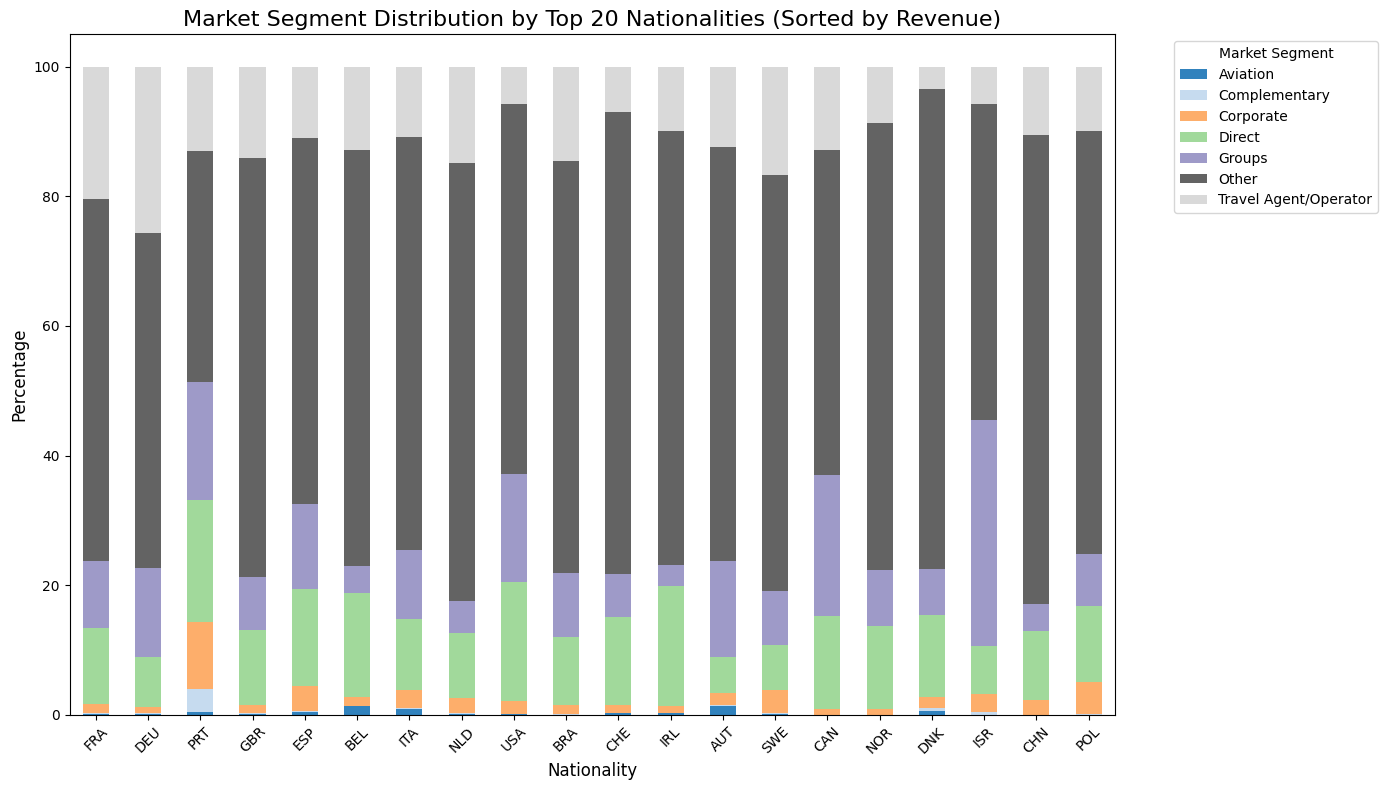

In [1914]:
stacked_data = hotel_df.groupby(['nationality', 'market_segment']).size().reset_index(name='count')
stacked_data['percentage'] = stacked_data.groupby('nationality')['count'].transform(lambda x: x / x.sum() * 100)

# Top 20 nationalities by total revenue
top_nationalities_revenue = revenue_by_country.head(20)['nationality']

stacked_data = stacked_data[stacked_data['nationality'].isin(top_nationalities_revenue)]
stacked_pivot = stacked_data.pivot(index='nationality', columns='market_segment', values='percentage').fillna(0)

stacked_pivot = stacked_pivot.loc[top_nationalities_revenue]

stacked_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20c')
plt.title('Market Segment Distribution by Top 20 Nationalities (Sorted by Revenue)', fontsize=16)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Market Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**`FRA (France)`** and **`DEU (Germany)`** are both high in `revenue` and `booking counts`, and both show a relatively high portion market segment of `Travel Agent/Operator`, which may indicate that high tourist activities are organized via agencies in these countries.

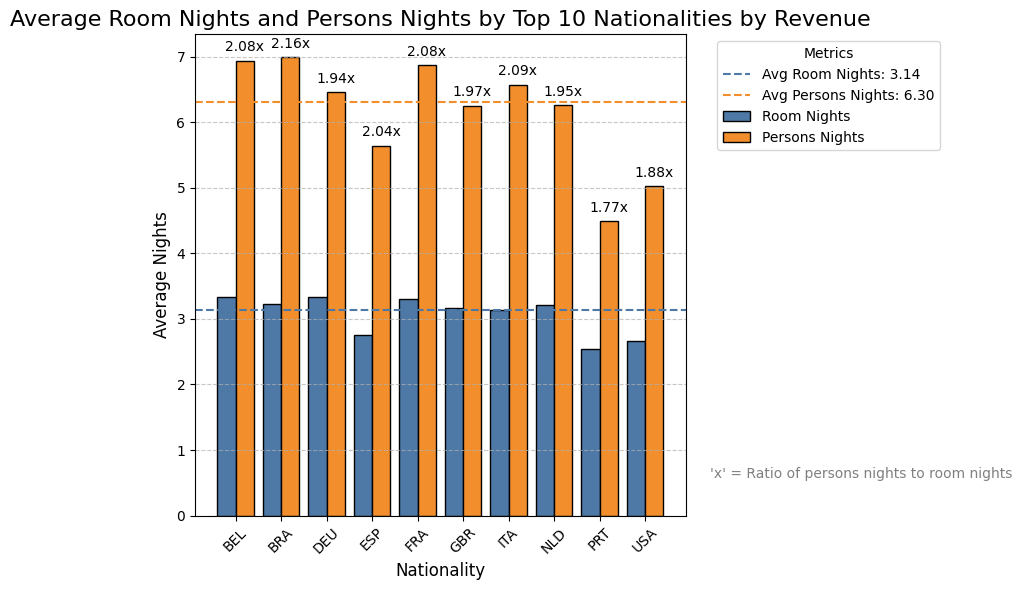

In [1915]:
# Overall Averages for all nationalities
overall_avg_room_nights = room_persons_data['room_nights'].mean()
overall_avg_persons_nights = room_persons_data['persons_nights'].mean()

# Top 10 nationalities by revenue
top_10_nationalities = top_revenue_data['nationality']
room_persons_top = room_persons_data[room_persons_data['nationality'].isin(top_10_nationalities)]

room_persons_avg = room_persons_top.groupby('nationality').agg({
    'room_nights': 'mean',
    'persons_nights': 'mean'
}).reset_index()

room_persons_avg['ratio'] = room_persons_avg['persons_nights'] / room_persons_avg['room_nights']

x = range(len(room_persons_avg['nationality']))
width = 0.4  # Width of the bars

plt.figure(figsize=(9, 6))

# Bar for room nights
bars_room = plt.bar(x, room_persons_avg['room_nights'], width, label='Room Nights', color='#4E79A7', edgecolor='black')

# Bar for persons nights
bars_persons = plt.bar([i + width for i in x], room_persons_avg['persons_nights'], width, label='Persons Nights', color='#F28E2B', edgecolor='black')

# Add horizontal lines for averages across all countries
plt.axhline(overall_avg_room_nights, color='#4E79A7', linestyle='--', linewidth=1.5, label=f'Avg Room Nights: {overall_avg_room_nights:.2f}')
plt.axhline(overall_avg_persons_nights, color='#F28E2B', linestyle='--', linewidth=1.5, label=f'Avg Persons Nights: {overall_avg_persons_nights:.2f}')

# Add ratio labels on top of bars
for i, rect in enumerate(bars_persons):
    ratio = room_persons_avg.iloc[i]['ratio']
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.1, f'{ratio:.2f}x', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Average Room Nights and Persons Nights by Top 10 Nationalities by Revenue', fontsize=16)

plt.text(1.05, 0.1, "'x' = Ratio of persons nights to room nights", 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='left', color='gray')

plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Average Nights', fontsize=12)
plt.xticks([i + width / 2 for i in x], room_persons_avg['nationality'], rotation=45, fontsize=10)
plt.legend(title='Metrics', fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() 

plt.show()


The **`Ratio`** of `Persons Nights` to `Room Nights` in the above chart is a proxy for group size.

`Higher ratio` is likely larger groups or families sharing rooms

`Lower ratio` is likely solo travelers or smaller groups. 

**`PRT (Portugal)`** : `Portugal` has relatively lower room nights and persons nights, which aligns with the idea that `PRT` bookings are likely shorter and local. Business trips - Frequent corporate bookings with minimal stays.
Local residents - Using the hotel for short stays due to its location in Lisbon.

## Age

In [1916]:
hotel_df[['age']].describe()

,age
count,60726.00
mean,47.29
std,14.95
min,0.00
25%,36.00
50%,47.00
75%,58.00
max,114.00


To make the analysis more clear, `age` wil be divided into multiple categories.

In [1917]:
bins = [0, 17, 24, 34, 49, 64, float('inf')]
labels = ['Minor (under age)', 'Young Adult (18-24)', 'Early Career (25-34)', 
          'Mid Career (35-49)', 'Pre-Retirement (50-64)', 'Retired (65+)']
hotel_df['age_category'] = pd.cut(hotel_df['age'], bins=bins, labels=labels, right=False)

print(hotel_df['age_category'].value_counts())

age_category
Pre-Retirement (50-64)    19810
Mid Career (35-49)        19524
Early Career (25-34)       9620
Retired (65+)              8995
Young Adult (18-24)        1986
Minor (under age)           791
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

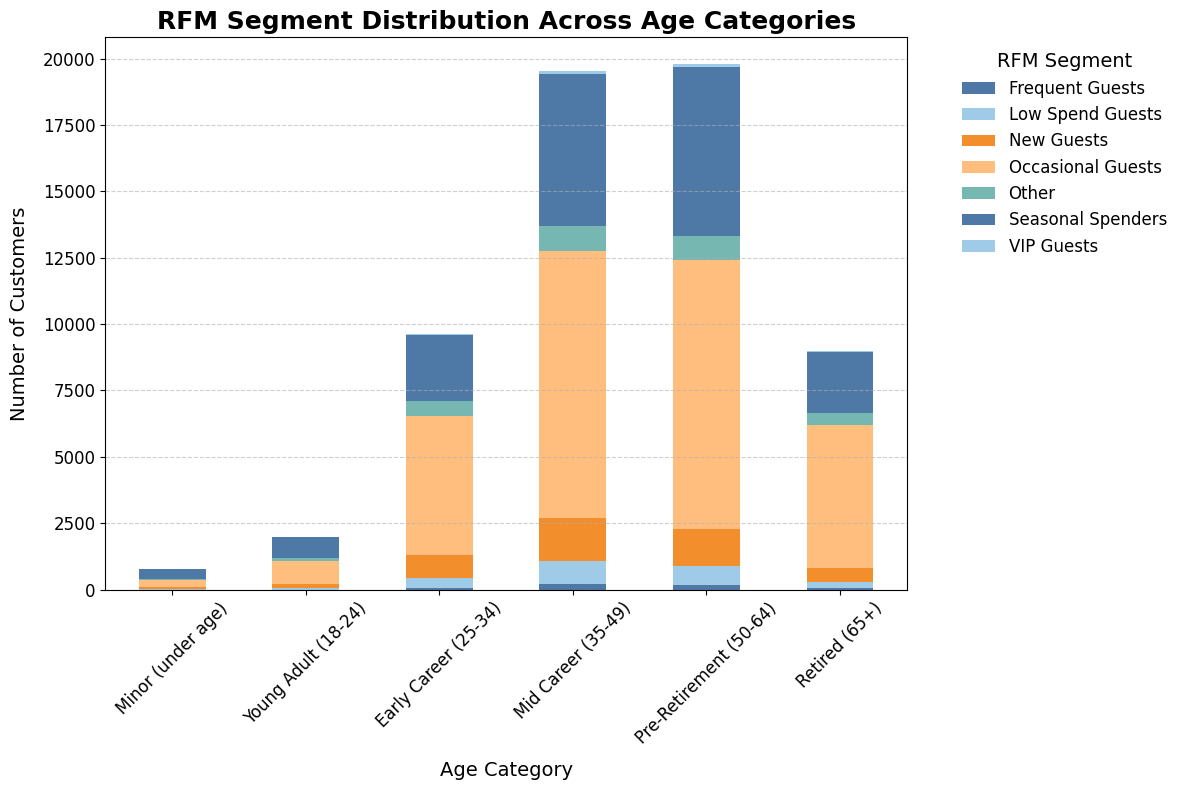

In [1918]:
rfm_age_distribution = hotel_df.groupby(['age_category', 'segment'], observed=True).size().reset_index(name='count')
rfm_age_pivot = rfm_age_distribution.pivot(index='age_category', columns='segment', values='count').fillna(0)

palette = ['#4E79A7', '#A0CBE8', '#F28E2B', '#FFBE7D', '#76B7B2']

plt.figure(figsize=(12, 8))
rfm_age_pivot.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8), 
    color=palette
)

plt.title('RFM Segment Distribution Across Age Categories', fontsize=18, weight='bold')
plt.xlabel('Age Category', fontsize=14, labelpad=10)
plt.ylabel('Number of Customers', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(
    title='RFM Segment', 
    fontsize=12, 
    title_fontsize=14, 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    frameon=False
)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


# Conclusion

# **Assumptions and Caveats**

In [1920]:
# customers_table = hotel_df[['id', 'nationality', 'age', 'days_since_first_stay',
#                               'days_since_last_stay', 'market_segment','segment']]
# customers_table.to_csv('customers_table.csv', index=False, na_rep="NULL")
# revenue_table = hotel_df[['id', 'lodging_revenue', 'other_revenue', 'total_revenue']]
# revenue_table.to_csv('revenue_table.csv', index=False)
# bookings_table = hotel_df[['id', 'bookings_checked_in', 'bookings_no_showed',
#                               'bookings_canceled', 'average_lead_time', 'days_since_creation', 'distribution_channel','persons_nights', 'room_nights']]
# bookings_table.to_csv('bookings_table.csv', index=False)
# preferences_table = hotel_df[['id', 'sr_high_floor', 'sr_low_floor', 'sr_accessible_room',
#                               'sr_medium_floor', 'sr_bathtub', 'sr_shower', 'sr_crib', 
#                                'sr_king_size_bed', 'sr_twin_bed', 'sr_near_elevator',
#                                'sr_away_from_elevator', 'sr_no_alcohol_in_mini_bar', 'sr_quiet_room']]
# preferences_table.to_csv('preferences_table.csv', index=False)